# UK Data Analysis Exercise

## Summary:

##### Purpose is to explore and analyse the no. Accidents in the UK from 2012 - 2015 where we:
<p> 
- Assess which speed limit causes highest no. of accidents <br>
- Look at Seasonal movements by Hour, Day, Month, Year <br>
- Add in external factors such as Road Types and Light Conditions <br>
- Compare Rural and Urban Areas <br> 

</p>




### Questions: 
<p>
- What Speed Limit Causes the Most Accidents? <br>
- What is the Most Dangerous Time to Drive? <br>
- What Year, Month Has the Highest Amount of Accidents? <br>
- What Days of the week has more serious accidents? <br>
- What Road and Light Conditions influence accidents? <br>
- Are Fatal Accidents more common in Rural or Urban Areas? <br>
    
</p>

### Import Modules:

In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import iplot
from ipywidgets import IntSlider

cf.go_offline()
sns.set(style='darkgrid')
sns.set_palette('colorblind')

In [2]:
slider = IntSlider(value=50)
slider

IntSlider(value=50)

### Convert Excel to CSV reduce workload:

In [3]:
#ukdata = pd.read_excel(r'/Users/danhosanee/Downloads/Dataset.xlsx')

In [4]:
#ukdata.to_csv('ukdata.csv', encoding='utf-8', index=False)

### Set Directory for Dict Folder

In [5]:
#Set current dir to dic data folder
os.chdir('/Users/danhosanee/Downloads/contextCSVs (accidents)')

In [6]:
ukData = pd.read_csv('ukdata.csv')

### Check the Data

In [7]:
ukData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570609 entries, 0 to 570608
Data columns (total 28 columns):
ID                                             570609 non-null int64
Location_Easting_OSGR                          570582 non-null float64
Location_Northing_OSGR                         570582 non-null float64
Longitude                                      570582 non-null float64
Latitude                                       570582 non-null float64
Police_Force                                   570609 non-null int64
Accident_Severity                              570609 non-null int64
Number_of_Vehicles                             570609 non-null int64
Number_of_Casualties                           570609 non-null int64
Date                                           570609 non-null object
Day_of_Week                                    570609 non-null int64
Time                                           570578 non-null object
Local_Authority_(District)                     5706

### Add Data Dictionary for Accident Severity to the DF

In [8]:
#Severity of Accident Caterogies
accsev_dic = pd.read_csv('Accident_Severity.csv')

#Merge accsev to UkData
ukData = ukData.merge(accsev_dic , how ='left', left_on=['Accident_Severity'], right_on=['code'])

#Rename label Column 
ukData = ukData.rename(columns={'label':'Accident_Severity_Label'})

#Test
ukData.sample(5)

,ID,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,code,Accident_Severity_Label
24128,24129,304920.0,518860.0,-3.471719,54.556031,3,3,3,1,2012-01-10,...,-1,0,0,0,1,2,1,E01019256,3,Slight
129548,129549,367310.0,101470.0,-2.465381,50.811787,55,3,2,1,2012-08-15,...,-1,0,0,0,1,2,1,E01020509,3,Slight
503160,503161,457061.0,338994.0,-1.152280,52.945308,31,3,2,1,2015-07-11,...,6,0,0,5,1,1,1,E01013871,3,Slight
543732,543733,518873.0,133399.0,-0.304096,51.087598,47,2,2,1,2015-08-07,...,6,0,0,0,1,2,1,E01031646,2,Serious
206612,206613,425760.0,323175.0,-1.619323,52.805494,21,3,2,1,2013-05-18,...,3,511,0,4,1,2,2,E01029471,3,Slight


## Speed Limit


In [9]:
#Create a Grouped DF comparing Speed Limit against Accident_Severity_Label
speed_gp = pd.crosstab(ukData.Speed_limit,ukData.Accident_Severity_Label, margins=True, margins_name='Total')

#Avg Accidents that occur at the differnet speed Limits
speed_gp_avg = pd.crosstab(ukData.Speed_limit,ukData.Accident_Severity_Label).mean(axis=1)

#Highlight Max Values
speed_gp.style.highlight_max(color='lightblue')

Accident_Severity_Label,Fatal,Serious,Slight,Total
Speed_limit,,,,
0,0,0,1,1
10,0,0,3,3
20,55,1890,10674,12619
30,2214,47701,319183,369098
40,636,7071,39518,47225
50,448,3459,18075,21982
60,2361,16193,61705,80259
70,805,4925,33692,39422
Total,6519,81239,482851,570609


In [10]:
print("% of Accidents at Speed Limits")
ukData.Speed_limit.value_counts(normalize=True).round(2)

% of Accidents at Speed Limits


30    0.65
60    0.14
40    0.08
70    0.07
50    0.04
20    0.02
10    0.00
0     0.00
Name: Speed_limit, dtype: float64

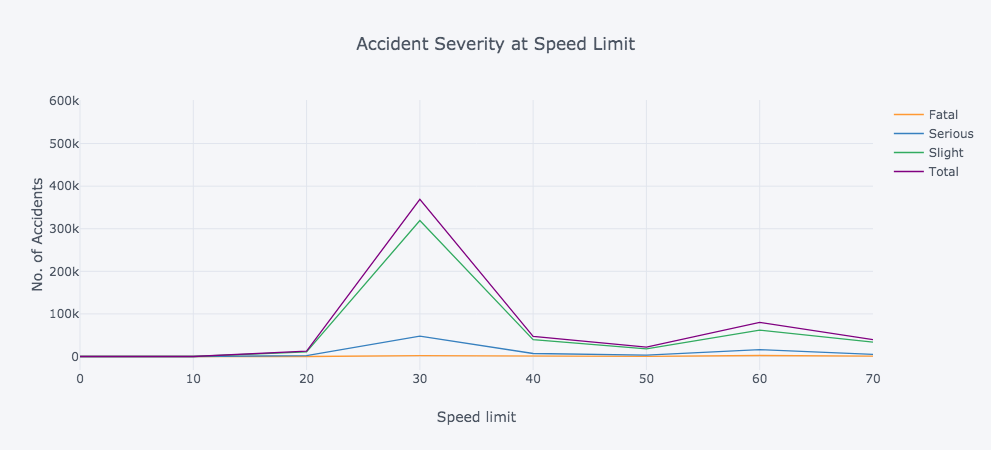

In [11]:
#Plot Accident Severity by Speed Limit
speed_gp.iplot(kind='line', title='Accident Severity at Speed Limit',
               xTitle='Speed limit', yTitle='No. of Accidents', fill=False)

<p> 
- Highest Peak of Accidents at Speed limit 30 is 369k of which is 65% of Total Accidents <br>
- Fatal Accidents Highest point is at Speed limit 60 unlike other Severity Types (Serious, Slight) <br>
</p>


### Seasonality: Time, Day, Month, Year


<p> Prepping the Data to get Seasonal values </p>

In [12]:
#Seasonality, Dict Data
dotw_dic = pd.read_csv('Day_of_Week.csv')

#Convert Date Object to Datetime 
ukData['Date'] = pd.to_datetime(ukData['Date'], format='%Y-%m-%d')
ukData['Time'] = pd.to_datetime(ukData['Time'], format='%H:%M:%S')

#Get the Year only from Date column
ukData['Year'] = ukData.Date.dt.year

#Get the Month only from Month Column
ukData['Month'] = ukData.Date.dt.strftime('%b')

#Get the Time in Hour by hours column covert to Int
ukData['Hour'] = ukData.Time.dt.hour.fillna(0).astype(int)

#Create an instance with the relevant columns to Analyse different seasonal Data
season = ukData[['ID','Date', 'Year', 'Month','Day_of_Week','Hour','Accident_Severity_Label']]

In [13]:
#Merge The Dictionary file with the Season Dataframe
season = (season.merge(dotw_dic, how ='left', left_on=['Day_of_Week'], right_on=['code'])
          .reindex(columns=['ID','Date', 'Year', 'Month','Day_of_Week','label','Hour','Accident_Severity_Label']))

#Test the Data
season.sample(5)

,ID,Date,Year,Month,Day_of_Week,label,Hour,Accident_Severity_Label
566299,566300,2015-02-21,2015,Feb,7,Saturday,12,Serious
175877,175878,2013-11-22,2013,Nov,6,Friday,14,Slight
447026,447027,2015-02-07,2015,Feb,7,Saturday,19,Slight
381766,381767,2014-06-30,2014,Jun,2,Monday,1,Slight
472155,472156,2015-07-04,2015,Jul,7,Saturday,14,Serious


In [14]:
#rename label column to Day
season =  season.rename(columns={"label":"Day"})
#Test
season.sample(3)

,ID,Date,Year,Month,Day_of_Week,Day,Hour,Accident_Severity_Label
229577,229578,2013-11-19,2013,Nov,3,Tuesday,8,Slight
12721,12722,2012-06-22,2012,Jun,6,Friday,19,Slight
115205,115206,2012-04-08,2012,Apr,1,Sunday,11,Fatal


## Time

In [15]:
#Group Data ASL against Hours
seasongrphr = pd.crosstab(season.Hour, season.Accident_Severity_Label)

In [16]:
#% of accidents by hours
print("% of Accidents by Hour")
season.Hour.value_counts(normalize=True).round(2)

% of Accidents by Hour


17    0.09
16    0.08
15    0.08
8     0.07
18    0.07
14    0.06
13    0.06
12    0.06
11    0.05
19    0.05
9     0.05
10    0.05
7     0.04
20    0.04
21    0.03
22    0.02
6     0.02
23    0.02
0     0.01
1     0.01
5     0.01
2     0.01
3     0.01
4     0.01
Name: Hour, dtype: float64

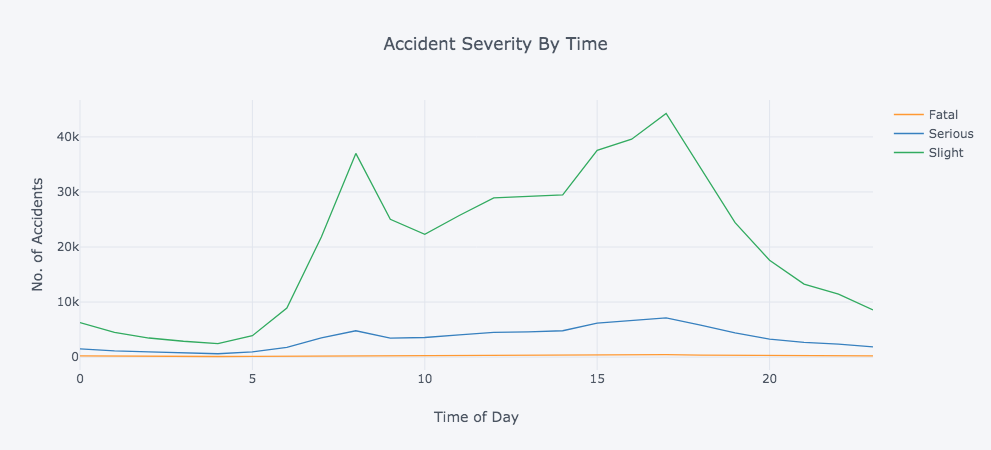

In [17]:
#Plot Hour against ASL
seasongrphr.iplot(kind='line', xTitle='Time of Day', yTitle='No. of Accidents', title='Accident Severity By Time')

<p> 
- Most dangerous times to Drive would be at 8am and 3-6pm based on volume <br>
- Highest No. Accident occurs at 5pm accounting for 9% for all accidents  <br>
</p>

### Day

In [18]:
#Group ASL by Day
seasongrpday = (season.groupby(['Accident_Severity_Label','Day'])['Accident_Severity_Label'].agg('count')
                .unstack('Accident_Severity_Label').reindex(['Sunday','Monday','Tuesday','Wednesday',
                                                                  'Thursday','Friday','Saturday']))
#Highlight Max Values
seasongrpday.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Day,,,
Sunday,1041,10322,50545
Monday,848,11057,69961
Tuesday,853,11750,74064
Wednesday,823,11685,73528
Thursday,859,11862,74058
Friday,993,12950,78946
Saturday,1102,11613,61749


In [19]:
seasonPerday = pd.crosstab(season.Day,season.Accident_Severity_Label).reindex(['Monday','Tuesday','Wednesday',
                                                                  'Thursday','Friday','Saturday','Sunday'])

seasonPerday

Accident_Severity_Label,Fatal,Serious,Slight
Day,,,
Monday,848,11057,69961
Tuesday,853,11750,74064
Wednesday,823,11685,73528
Thursday,859,11862,74058
Friday,993,12950,78946
Saturday,1102,11613,61749
Sunday,1041,10322,50545


In [45]:
#Group Day by ASL then Normalize, Covert to % and Highlight Max % values
seasongrpdayPer=((pd.crosstab(season['Day'],season['Accident_Severity_Label'],normalize='columns')
     .reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])*100)
     .style.format('{0:,.0f}%')
     .highlight_max(color='yellow'))

# seasongrpdayPer
print('No. of Accident Year, Day')
season.Day.groupby(season.Year).value_counts()

No. of Accident Year, Day


Year  Day      
2012  Friday       23511
      Thursday     22334
      Wednesday    21997
      Tuesday      21661
      Monday       20910
      Saturday     19302
      Sunday       15856
2013  Friday       23044
      Tuesday      21257
      Thursday     21186
      Wednesday    20461
      Monday       19831
      Saturday     18027
      Sunday       14854
2014  Friday       23960
      Tuesday      22318
      Wednesday    22210
      Thursday     21780
      Monday       21093
      Saturday     19021
      Sunday       15940
2015  Friday       22374
      Thursday     21479
      Tuesday      21431
      Wednesday    21368
      Monday       20032
      Saturday     18114
      Sunday       15258
Name: Day, dtype: int64

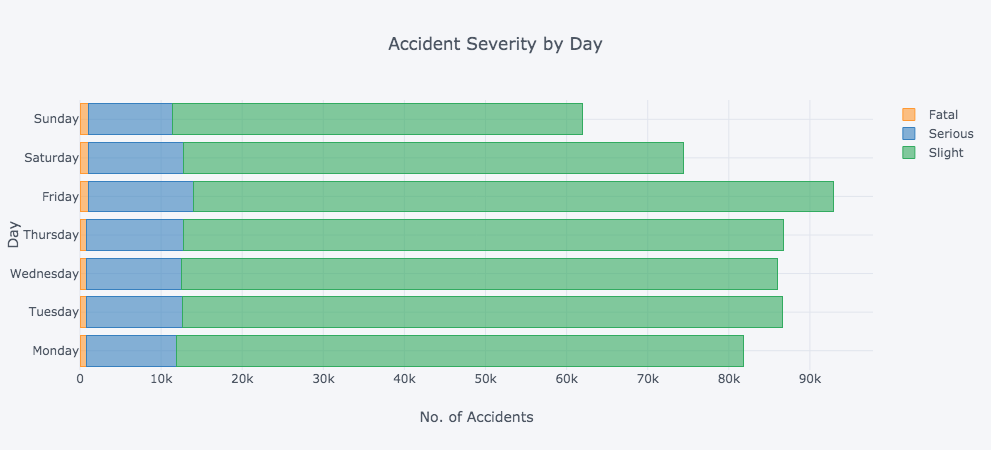

In [155]:
seasonPerday.iplot(kind='barh', barmode='stack',
                   title='Accident Severity by Day',
                   yTitle='Day',
                   xTitle='No. of Accidents')

<p> 
- Friday has the highest No. of Accidents at 92k Overall and is the highest in Serious and Slight Accident Types <br>
- Saturday has the most Fatal Accidents at 1.1k <br>
- Weekends have a higher trend in Fatal Accidents, Weekdays have a higher trend in Slight and Serious Accident Types <br>
</p>

## Month

In [22]:
#Group ASL by Month
seasongrpmonth = (season.groupby(['Accident_Severity_Label','Month'])['ID'].agg('count')
                                  .unstack('Accident_Severity_Label')
                                  .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
#Highlight Max Values
seasongrpmonth.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Month,,,
Jan,505,6065,39179
Feb,433,5622,35593
Mar,488,6295,38526
Apr,501,6070,36093
May,550,7141,39941
Jun,530,7028,40345
Jul,583,7603,43441
Aug,570,7129,39531
Sep,564,7229,41318


In [23]:
#Group ASL and Month & Normalize by ASL
((pd.crosstab(season['Month'],season['Accident_Severity_Label'],normalize='columns')*100)
    .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).style.format('{0:,.0f}%')
    .highlight_max(color='yellow'))

Accident_Severity_Label,Fatal,Serious,Slight
Month,,,
Jan,8%,7%,8%
Feb,7%,7%,7%
Mar,7%,8%,8%
Apr,8%,7%,7%
May,8%,9%,8%
Jun,8%,9%,8%
Jul,9%,9%,9%
Aug,9%,9%,8%
Sep,9%,9%,9%


In [70]:
(season.Month.value_counts(normalize=True)*100)

Oct    9.165821
Nov    9.130070
Jul    9.047702
Sep    8.606769
Jun    8.395066
May    8.347573
Dec    8.296049
Aug    8.277121
Jan    8.017574
Mar    7.940464
Apr    7.476924
Feb    7.298868
Name: Month, dtype: float64

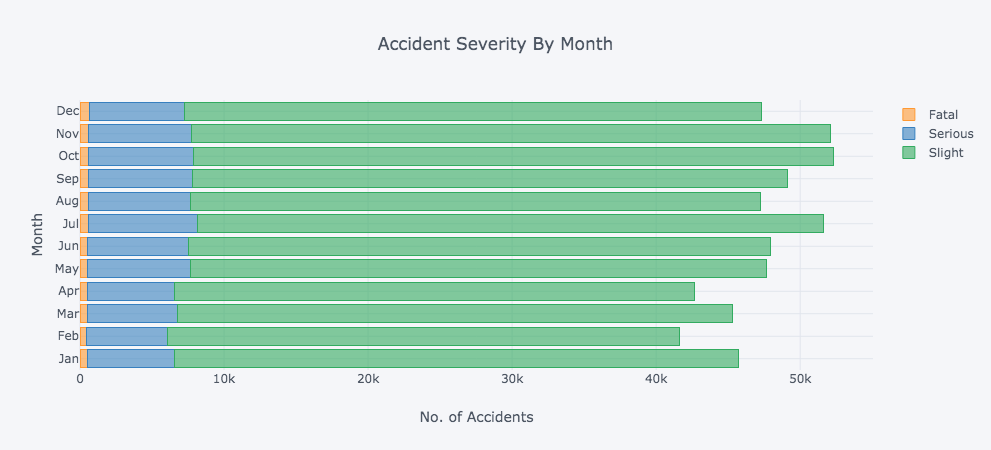

In [58]:
seasongrpmonth.iplot(kind='barh', barmode='stack',title='Accident Severity By Month',xTitle='No. of Accidents',
                     yTitle='Month')

<p> 
- October 52.3k (9.16%) , November 52k (9.13%) , July 51.6k (9.04%) are the top 3 Months that have highest accidents <br>
- Highest No. Fatal Accidents Occur in Dec 654 <br>
</p>

## Year

In [25]:
#Group Data ASL against Year
seasongrpyear = (season.groupby(['Accident_Severity_Label','Year'])['ID'].agg('count')
                 .unstack('Accident_Severity_Label'))

#Highlight Max Values
seasongrpyear.style.highlight_max(color='yellow').highlight_min(color='lightgreen')

Accident_Severity_Label,Fatal,Serious,Slight
Year,,,
2012,1637,20901,123033
2013,1608,19624,117428
2014,1658,20676,123988
2015,1616,20038,118402


In [100]:
season.Year.value_counts().sort_index()

2012    145571
2013    138660
2014    146322
2015    140056
Name: Year, dtype: int64

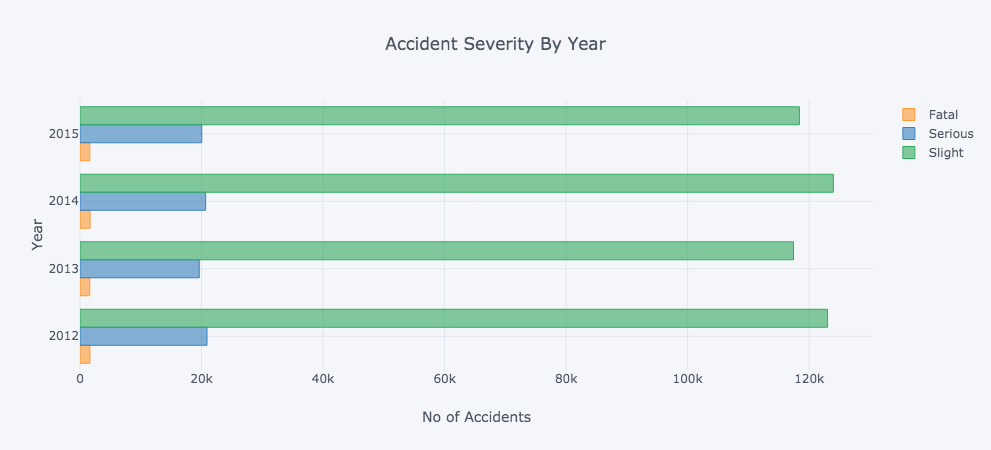

In [26]:
seasongrpyear.iplot(kind='barh', xTitle='No of Accidents', yTitle='Year',title='Accident Severity By Year')

<p> 
- 2014 has the Highest No. of Accidents by Year totalling 146k <br>
- 2013 has the Lowest No. of Accidents by Year totalling 138k <br>
- No Trend in Overall No. of Accidents By Year and ASL <br>
</p>
    
    

<br>

## External Factors

In [27]:
#External Factors Dict's Import
road_dic = pd.read_csv('Road_Type.csv')
light_dic = pd.read_csv('Light_Conditions.csv')

In [28]:
#Create an instance of the ukData and assign to ext_fac to reduce columns
ext_fac = ukData[['ID','Light_Conditions','Road_Type','Accident_Severity_Label']]
ext_fac.sample(5)

,ID,Light_Conditions,Road_Type,Accident_Severity_Label
219851,219852,1,2,Slight
378021,378022,1,3,Serious
300924,300925,4,6,Slight
204406,204407,1,6,Slight
340141,340142,1,6,Slight


In [29]:
#Merge Data with Road_Type Dic File
ext_fac = (ext_fac.merge(road_dic, how ='left', left_on=['Road_Type'], right_on=['code']))
ext_fac = ext_fac.rename(columns={'label':'Road'})
ext_fac.head()

,ID,Light_Conditions,Road_Type,Accident_Severity_Label,code,Road
0,1,4,6,Slight,6,Single carriageway
1,2,4,6,Slight,6,Single carriageway
2,3,1,2,Slight,2,One way street
3,4,1,6,Slight,6,Single carriageway
4,5,4,6,Slight,6,Single carriageway


In [30]:
#Merge Data with Light Conditions
ext_fac = (ext_fac.merge(light_dic, how='left', left_on=['Light_Conditions'], right_on=['code']))
ext_fac = ext_fac.rename(columns={'label':'Light'})
ext_fac.head()

,ID,Light_Conditions,Road_Type,Accident_Severity_Label,code_x,Road,code_y,Light
0,1,4,6,Slight,6,Single carriageway,4,Darkness - lights lit
1,2,4,6,Slight,6,Single carriageway,4,Darkness - lights lit
2,3,1,2,Slight,2,One way street,1,Daylight
3,4,1,6,Slight,6,Single carriageway,1,Daylight
4,5,4,6,Slight,6,Single carriageway,4,Darkness - lights lit


##### View the Dic Data for Road and Light Factors

In [31]:
#Create Instance with Columns being used for Groupby
ext_fac_fin = ext_fac.reindex(columns=['ID','Accident_Severity_Label','Road','Light'])
#Test
ext_fac_fin.head()

,ID,Accident_Severity_Label,Road,Light
0,1,Slight,Single carriageway,Darkness - lights lit
1,2,Slight,Single carriageway,Darkness - lights lit
2,3,Slight,One way street,Daylight
3,4,Slight,Single carriageway,Daylight
4,5,Slight,Single carriageway,Darkness - lights lit


In [109]:
#Group Road, Light against ASL
ext_fac_plt = pd.crosstab([ext_fac_fin['Road'],ext_fac_fin['Light']],ext_fac_fin['Accident_Severity_Label'],
                          margins=True, margins_name='Total')
ext_fac_plt

Accident_Severity_Label                         Fatal  Serious  Slight   Total
Road               Light                                                      
Dual carriageway   Darkness - lighting unknown     24      122     992    1138
                   Darkness - lights lit          274     2244   13623   16141
                   Darkness - lights unlit         17       83     469     569
                   Darkness - no lighting         305      993    4727    6025
                   Daylight                       638     6675   50226   57539
One way street     Darkness - lighting unknown      2       17     104     123
                   Darkness - lights lit           21      402    2355    2778
                   Darkness - lights unlit          0        5      50      55
                   Darkness - no lighting           3       14      51      68
                   Daylight                        46     1093    7136    8275
Roundabout         Darkness - lighting unknown      2       60     537     599
                   Darkness - lights lit           32      982    8287    9301
                   Darkness - lights unlit          1       25     205     231
                   Darkness - no lighting           2       26     143     171
                   Daylight                        65     2828   26301   29194
Single carriageway Darkness - lighting unknown     57      941    5219    6217
                   Darkness - lights lit          930    12883   67566   81379
                   Darkness - lights unlit         47      393    1785    2225
                   Darkness - no lighting         859     4888   16867   22614
                   Daylight                      3136    45702  268795  317633
Slip road          Darkness - lighting unknown      1        6      92      99
                   Darkness - lights lit           11      119    1017    1147
                   Darkness - lights unlit          0        1      34      35
                   Darkness - no lighting           9       46     276     331
                   Daylight                        16      407    3938    4361
Unknown            Darkness - lighting unknown      1       10      73      84
                   Darkness - lights lit            3       48     276     327
                   Darkness - lights unlit          0        3      14      17
                   Darkness - no lighting           2       16      93     111
                   Daylight                        15      207    1600    1822
Total                                            6519    81239  482851  570609

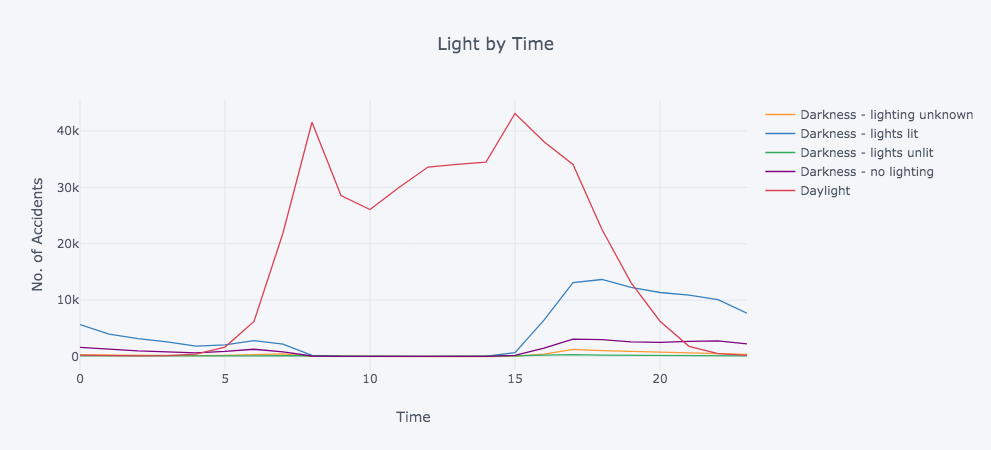

In [146]:
season.Hour.groupby([ext_fac_fin.Light]).value_counts().unstack('Light').iplot(kind='line',title='Light by Time'
                                                                               , yTitle='No. of Accidents', xTitle='Time')

<p> 
- Inverse relationship with Darkness and Daylight in No of Accidents <br>
- Daylight Accidents Peaks at 8am and 3pm which is the opposite of Darkness Accidents <br>
- Accidents in Darkness start to rise after 3pm, peaking at 6pm <br>
</p>

In [144]:
print('Road Types %')
ext_fac_fin.Road.value_counts(normalize=True)

Road Types %


Single carriageway    0.753700
Dual carriageway      0.142676
Roundabout            0.069217
One way street        0.019802
Slip road             0.010468
Unknown               0.004138
Name: Road, dtype: float64

Text(0.5,1,'Accident Severity By External Factors')

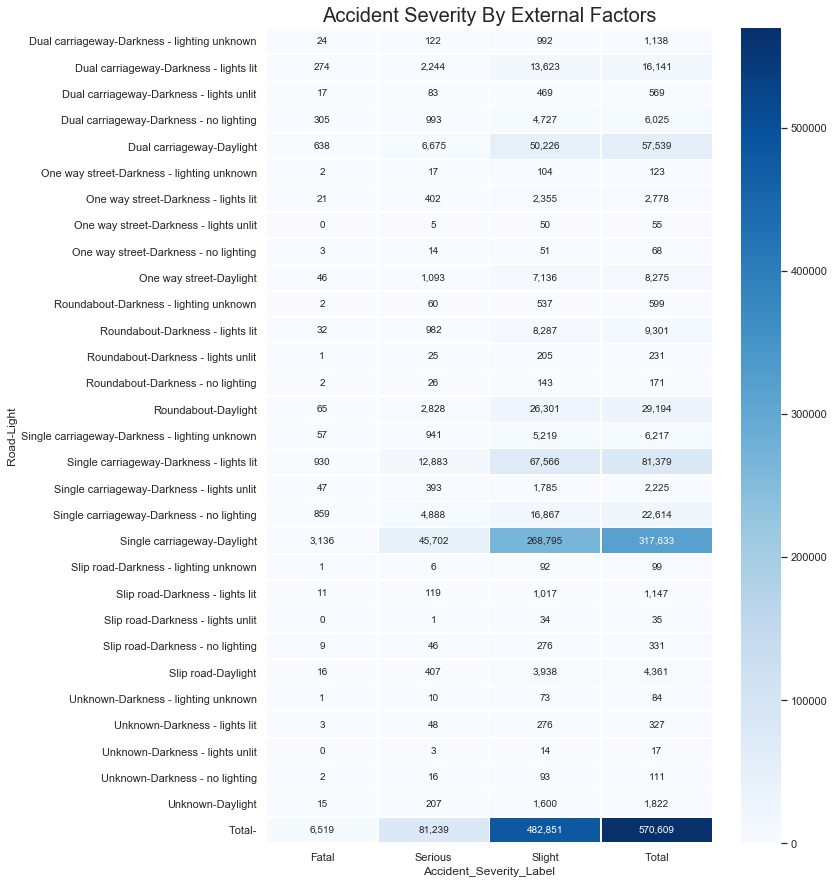

In [33]:
#Plot a HeatMap of Road,Light and ASL
f, ax = plt.subplots(figsize=(10, 15))
sns.heatmap(ext_fac_plt,cmap='Blues', annot=True, cbar=True, fmt='0,g', ax=ax, linewidths=0.5,vmax=570000) 
ax.set_title('Accident Severity By External Factors', loc='center',fontsize=20)

<p> 
- Single Carriageway Roads in  Daylight (317k) and Lights Lit conditions (81K) had the highest no. of accidents <br>
- Carriageways/Roundabout Road Types have a major influnce in no. of accidents making up 90% of Total Accidents <br>
</p>

## Geographic


In [34]:
#Geography Dictionary assign to a variable
urban_rural_dic = pd.read_csv('Urban_Rural.csv')
urban_rural_dic.head(3)

,code,label
0,1,Urban
1,2,Rural
2,3,Unallocated


In [35]:
#Create an instance of ukData 
geo_area = ukData[['ID','Urban_or_Rural_Area','Accident_Severity_Label']]
#Test
geo_area.sample(5)

,ID,Urban_or_Rural_Area,Accident_Severity_Label
139089,139090,2,Slight
416113,416114,2,Slight
106072,106073,2,Slight
341195,341196,1,Slight
346994,346995,1,Slight


In [36]:
#Merge Data to Dic Values
geo_area = geo_area.merge(urban_rural_dic,how='left',left_on=['Urban_or_Rural_Area'], right_on=['code'])
#Test
geo_area.sample(5)

,ID,Urban_or_Rural_Area,Accident_Severity_Label,code,label
505840,505841,2,Slight,2,Rural
416433,416434,2,Slight,2,Rural
566873,566874,1,Slight,1,Urban
557504,557505,2,Slight,2,Rural
91153,91154,2,Slight,2,Rural


In [37]:
#Rename Label as Geography
geo_area = (geo_area.rename(columns={'label':'Geography'})
            .reindex(columns=['ID','Accident_Severity_Label','Geography']))

In [38]:
#Group ASL by Geography
geo_area_plt = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'],margins=False)
geo_area_plt

Accident_Severity_Label,Fatal,Serious,Slight
Geography,,,
Rural,4165,33546,159177
Urban,2354,47693,323674


In [39]:
#group ASL by Geo in % Terms based on ASL eg. 64% of fatal accidents are in rural areas
geo_area_plt_per = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'],normalize='columns')

#group ASL by Geo via Count
geo_area_plt = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'])


In [40]:
#View by Count
geo_area_plt.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Geography,,,
Rural,4165,33546,159177
Urban,2354,47693,323674


In [41]:
#ASL by Geo in % Terms based on ASL eg. 64% of fatal accidents are in rural areas
(geo_area_plt_per*100).style.format('{0:,.0f}%').highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Geography,,,
Rural,64%,41%,33%
Urban,36%,59%,67%


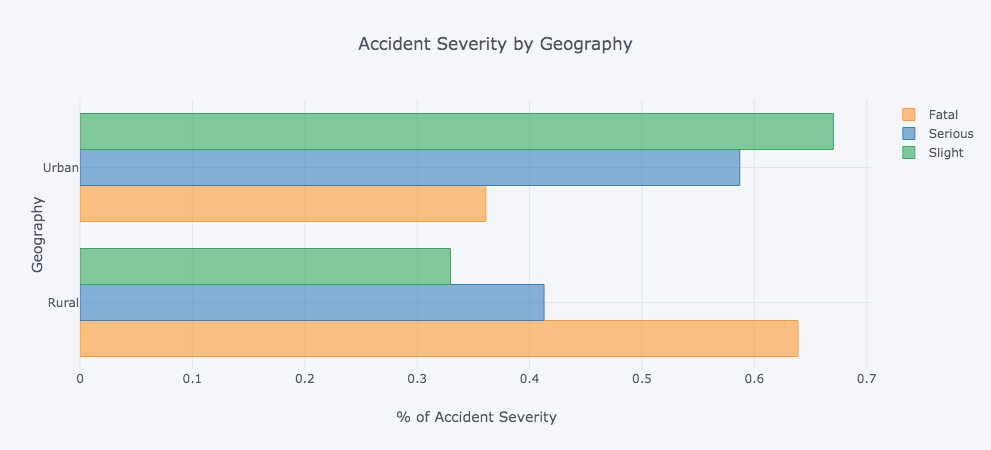

In [153]:
geo_area_plt_per.iplot(kind='barh',title='Accident Severity by Geography',xTitle='% of Accident Severity',yTitle='Geography')

<p> 
- 64% of Fatal accidents have occurred in Rural Areas <br>
- 59% of Serious accidents occur in Urban Areas <br>
- 67% of Slight accidents occur in Urban Areas <br>
</p>

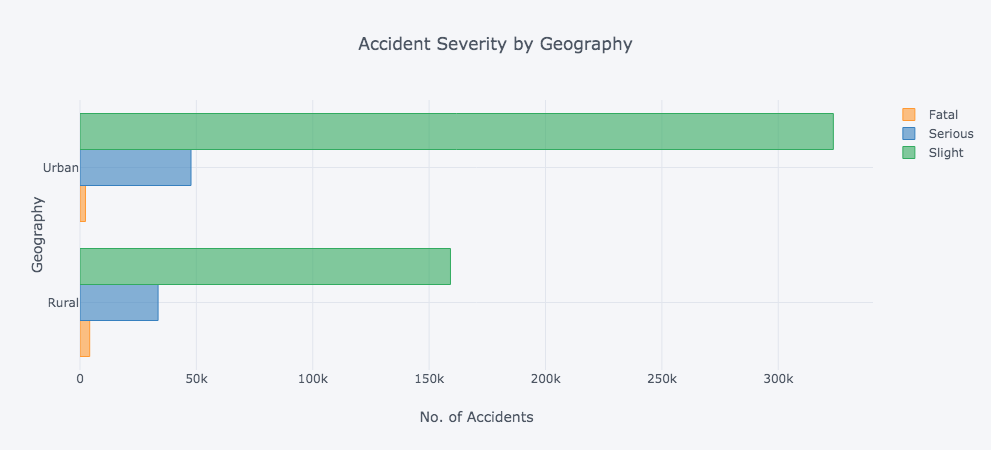

In [43]:
geo_area_plt.iplot(kind='barh',title='Accident Severity by Geography',xTitle='No. of Accidents',yTitle='Geography')

<p> 
- Fatal Accidents have occurred more in Rural than Urban Areas <br>
- Serious and Slight Accidents occur more in Urban areas than Rural <br>
</p>